# PageRank Algorithm

In [1]:
%pylab notebook
import numpy as np
import numpy.linalg as la
from utils.PageRankFunctions import *
from PIL import Image

np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


## Mini-internet network sample

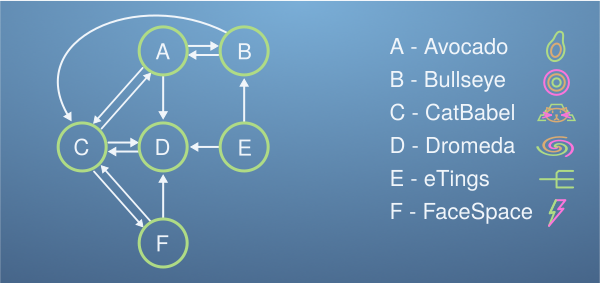

In [2]:
Image.open('images/internet.png')

### Linear algebra problem

In [3]:
# 각 사이트 지점에서 다른 사이트로 이동할 확률 매트릭스 L
L = np.array([[0,   1/2, 1/3, 0, 0,   0 ],
              [1/3, 0,   0,   0, 1/2, 0 ],
              [1/3, 1/2, 0,   1, 0,   1/2 ],
              [1/3, 0,   1/3, 0, 1/2, 1/2 ],
              [0,   0,   0,   0, 0,   0 ],
              [0,   0,   1/3, 0, 0,   0 ]])

# L에 대한 eigenvalue, eigenvector 계산
eigen_vals, eigen_vecs = la.eig(L)

# eigenvalue 내림차순으로 정렬
order = np.absolute(eigen_vals).argsort()[::-1]

# 정렬순서에 따라 eigenvalue, eigenvector 재정렬
eigen_vals = eigen_vals[order]
eigen_vecs = eigen_vecs[:,order]

# 첫번째 eigenvalue 에 대한 eigenvector 추출 및 비중확인 
r = eigen_vecs[:, 0] 
print(100 * np.real(r / np.sum(r)))

[16.          5.33333333 40.         25.33333333  0.         13.33333333]


### Power-iteration Method 

In [4]:
# 100명이 접속한다고 가정했을때, 초기 접속률은 모든 사이트마다 동일하게 구성
r = 100 * np.ones(6) / 6
lastR = r
r = L @ r
i = 0
while la.norm(lastR - r) > 0.01 : # 0.01 임계점까지 수행
    lastR = r
    r = L @ r
    i += 1
print(f"{str(i)} iterations to convergence.")
print(r)

18 iterations to convergence.
[16.00149917  5.33252025 39.99916911 25.3324738   0.         13.33433767]


## Cyclic internet network sample

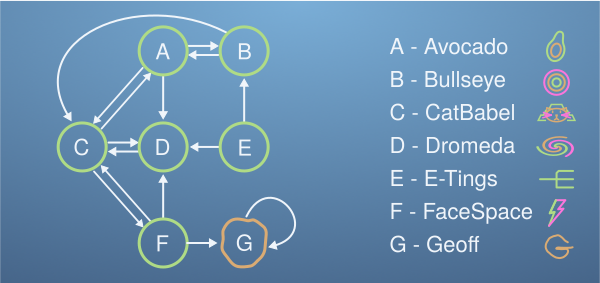

In [5]:
Image.open('images/internet2.png')
# 반복되는 G 사이트가 추가됨

### Adding dampling parameter

In [6]:
# 각 사이트 지점에서 다른 사이트로 이동할 확률 매트릭스 L2
L2 = np.array([[0,   1/2, 1/3, 0, 0,   0, 0 ],
               [1/3, 0,   0,   0, 1/2, 0, 0 ],
               [1/3, 1/2, 0,   1, 0,   1/3, 0 ],
               [1/3, 0,   1/3, 0, 1/2, 1/3, 0 ],
               [0,   0,   0,   0, 0,   0, 0 ],
               [0,   0,   1/3, 0, 0,   0, 0 ],
               [0,   0,   0,   0, 0,   1/3, 1 ]])

In [8]:
# 100명이 접속한다고 가정했을때, 초기 접속률은 모든 사이트마다 동일하게 구성
r = 100 * np.ones(7) / 7
lastR = r
r = L2 @ r
i = 0
while la.norm(lastR - r) > 0.01 : # 0.01 임계점까지 수행
    lastR = r
    r = L2 @ r
    i += 1
print(f"{str(i)} iterations to convergence.")
print(r)

# G 사이트에서 빠져나오지 못하고 머무를 확률 99.8% 비중

131 iterations to convergence.
[ 0.03046998  0.01064323  0.07126612  0.04423198  0.          0.02489342
 99.81849527]


In [9]:
d = 0.5 # 각 사이트에 랜덤으로 방문할 수 있는 확률
M = d * L2 + (1-d)/7 * np.ones([7, 7]) # 기존 방문확률에 가산

r = 100 * np.ones(7) / 7 # Sets up this vector (6 entries of 1/6 × 100 each)
lastR = r
r = M @ r
i = 0
while la.norm(lastR - r) > 0.01 :
    lastR = r
    r = M @ r
    i += 1
print(f"{str(i)} iterations to convergence.")
print(r)

# G 사이트에서 빠져나와 다른 사이트도 균등하게 방문하는 것을 확인

8 iterations to convergence.
[13.68217054 11.20902965 22.41964343 16.7593433   7.14285714 10.87976354
 17.90719239]


## extension to 100 Internet network 

In [12]:
# pageRank 함수작성
def pageRank(linkMatrix, d) :
    n = linkMatrix.shape[0]
    M = d * linkMatrix + (1-d)/n * np.ones([n, n]) 
    r = 100 * np.ones(n) / n
    lastR = r
    r = M @ r
    i = 0
    while la.norm(lastR - r) > 0.01 :
        lastR = r
        r = M @ r
        i += 1
    print(f"{str(i)} iterations to convergence.")
    return r

36 iterations to convergence.


<IPython.core.display.Javascript object>


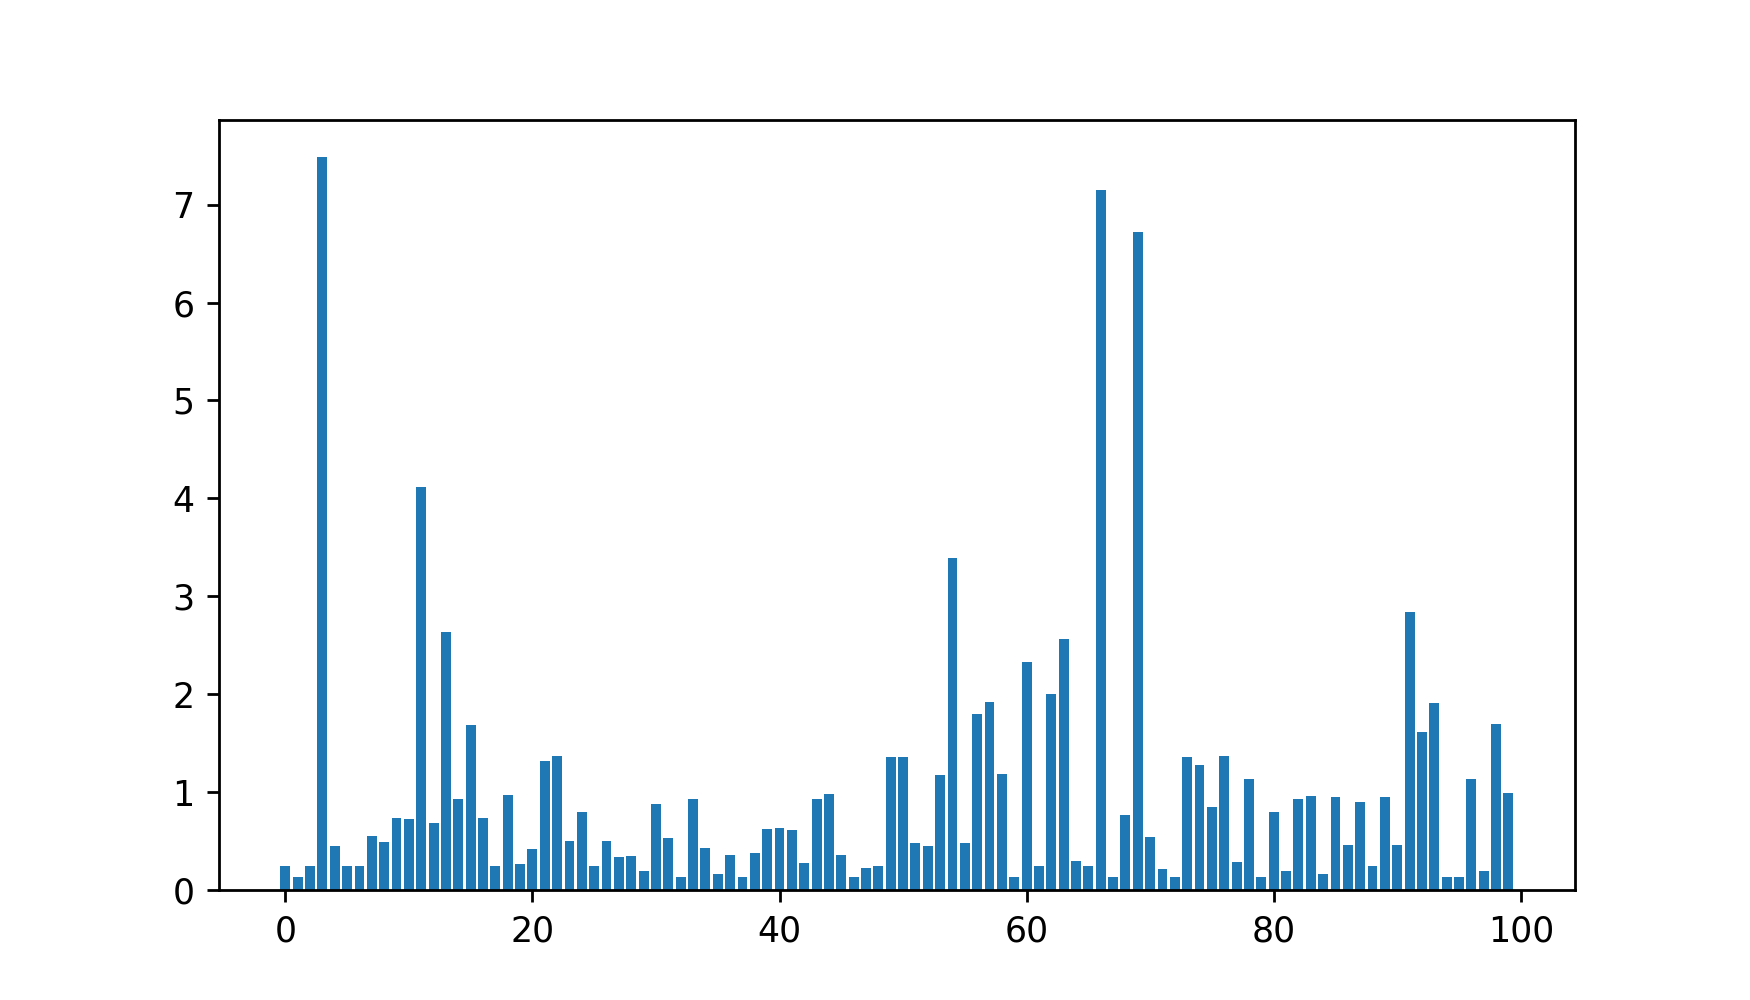

In [22]:
r = pageRank(generate_internet(100), 0.9)
plt.figure(figsize=(7, 4))
plt.bar(arange(r.shape[0]), r);

# 4, 66, 69번째 사이트가 방문비율이 높게 나타남